In [100]:
import numpy as np

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


!pip install pingouin
import pingouin as pg

In [101]:

# no_coating = [ np.round(i,2) for i in np.random.normal(11,1,30)];
# coating_a = [ np.round(i,2) for i in np.random.normal(11.25,1,30)];
# coating_b = [ np.round(i,2) for i in np.random.normal(11.75,1,30)];

no_coating = [12.57, 11.44, 12.07, 12.61, 11.15, 10.08, 11.66, 11.78, 10.94, 10.31, 10.52, 10.07, 11.25, 10.92, 10.63, 12.98, 11.46, 9.89, 12.44, 11.85, 10.8, 11.36, 10.8, 11.75, 9.36, 9.85, 11.66, 10.45, 9.84, 10.81]

coating_a = [11.16, 10.12, 11.8, 13.89, 10.51, 10.31, 10.75, 11.59, 11.57, 11.93, 10.04, 10.88, 11.32, 11.66, 11.8, 10.7, 11.96, 11.52, 9.86, 11.72, 10.3, 12.16, 12.21, 11.29, 11.04, 11.58, 10.26, 9.29, 10.32, 10.43]

coating_b = [11.59, 10.47, 10.93, 11.45, 12.73, 11.95, 10.28, 13.79, 11.95, 9.15, 11.76, 13.22, 9.88, 12.66, 12.53, 12.04, 11.51, 12.61, 11.27, 12.7, 12.74, 10.01, 12.07, 11.22, 11.04, 11.35, 12.01, 12.56, 12.37, 11.03]


In [102]:
print(coating_b)

[11.59, 10.47, 10.93, 11.45, 12.73, 11.95, 10.28, 13.79, 11.95, 9.15, 11.76, 13.22, 9.88, 12.66, 12.53, 12.04, 11.51, 12.61, 11.27, 12.7, 12.74, 10.01, 12.07, 11.22, 11.04, 11.35, 12.01, 12.56, 12.37, 11.03]


In [103]:
no_coating_df = pd.DataFrame(no_coating,columns=['QE'])
coating_a_df = pd.DataFrame(coating_a,columns=['QE'])
coating_b_df = pd.DataFrame(coating_b,columns=['QE'])

no_coating_df['Sensor Treatment'] = 'none'
coating_a_df['Sensor Treatment'] = 'coating A'
coating_b_df['Sensor Treatment'] = 'coating B'

coating_a_df.head()

,QE,Sensor Treatment
0,11.16,coating A
1,10.12,coating A
2,11.80,coating A
3,13.89,coating A
4,10.51,coating A


### Examples of how to concatenate our three prepared dataframes into one merged dataframe

In [104]:
no_coating_df['ObsID'] = np.arange(1,len(no_coating_df)+1)
coating_a_df['ObsID'] = np.arange(1,len(coating_a_df)+1)
coating_b_df['ObsID'] = np.arange(1,len(coating_b_df)+1)

coating_a_df.head()

,QE,Sensor Treatment,ObsID
0,11.16,coating A,1
1,10.12,coating A,2
2,11.80,coating A,3
3,13.89,coating A,4
4,10.51,coating A,5


In [105]:
concatDF = pd.concat([no_coating_df,coating_a_df,coating_b_df])
concatDF

,QE,Sensor Treatment,ObsID
0,12.57,none,1
1,11.44,none,2
2,12.07,none,3
3,12.61,none,4
4,11.15,none,5
...,...,...,...
25,11.35,coating B,26
26,12.01,coating B,27
27,12.56,coating B,28
28,12.37,coating B,29


In [106]:
concatDF = pd.concat([no_coating_df,coating_a_df,coating_b_df])
concatDF

concatDF = concatDF.reset_index(drop='0')
concatDF.head()

,QE,Sensor Treatment,ObsID
0,12.57,none,1
1,11.44,none,2
2,12.07,none,3
3,12.61,none,4
4,11.15,none,5


In [107]:
concatDF = pd.concat([no_coating_df,coating_a_df,coating_b_df],ignore_index=True,sort=False)
concatDF

,QE,Sensor Treatment,ObsID
0,12.57,none,1
1,11.44,none,2
2,12.07,none,3
3,12.61,none,4
4,11.15,none,5
...,...,...,...
85,11.35,coating B,26
86,12.01,coating B,27
87,12.56,coating B,28
88,12.37,coating B,29


https://pingouin-stats.org/build/html/generated/pingouin.rm_anova.html

# T-tests between two groups

Grab data for only groups where a sensor treatment has been applied (two groups!)

In [108]:
two_group_df = pd.concat([coating_a_df,coating_b_df])
two_group_df.head()

,QE,Sensor Treatment,ObsID
0,11.16,coating A,1
1,10.12,coating A,2
2,11.80,coating A,3
3,13.89,coating A,4
4,10.51,coating A,5


<Axes: xlabel='Sensor Treatment', ylabel='QE'>

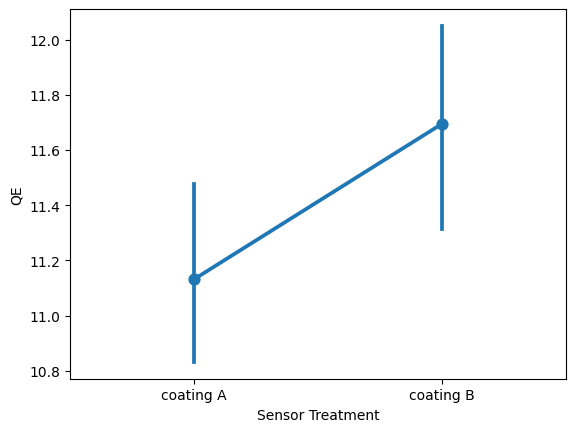

In [109]:
sns.pointplot(two_group_df, y='QE', x='Sensor Treatment')

### Unpaired ttest

First, test normality using the Shapiro-Wilk test.
https://pingouin-stats.org/build/html/generated/pingouin.normality.html

The null hypothesis is that the data is normally distributed.  If p<0.05 (or whatever alpha is) then it is unlikely that our data is normally distributed.

In [110]:
pg.normality(two_group_df['QE'])

,W,pval,normal
QE,0.988016,0.82222,True


Becuase the variable is normally distributed, we can continue using our normal parametric tests.  If it were not, we would have to look up the appropriate non-parametric test to use instead of an unpaired ttest.

In [111]:
pg.ttest(coating_a_df['QE'], coating_b_df['QE'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.200275,58,two-sided,0.031784,"[-1.08, -0.05]",0.568109,1.926,0.580757


### Paired ttest

In [112]:
pg.normality(two_group_df['QE'])

,W,pval,normal
QE,0.988016,0.82222,True


In [113]:
pg.ttest(coating_a_df['QE'], coating_a_df['QE'], paired=True)

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:248: UserWarning: x and y are equals. Cannot compute T or p-value.
  warnings.warn("x and y are equals. Cannot compute T or p-value.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,NaN,29,two-sided,NaN,"[nan, nan]",0.0,nan,0.05



# Anovas
---



<Axes: xlabel='Sensor Treatment', ylabel='QE'>

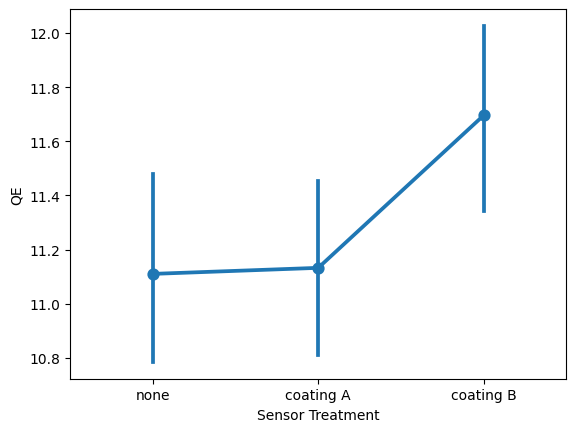

In [114]:
sns.pointplot(concatDF, y='QE', x='Sensor Treatment')

## One-way, between-subject ANOVA

In [115]:
pg.normality(concatDF['QE'])

,W,pval,normal
QE,0.989417,0.688237,True


In [116]:
# pg.homoscedasticity(concatDF, dv='QE')
pg.homoscedasticity(concatDF,dv='QE',group='Sensor Treatment')

,W,pval,equal_var
levene,0.240241,0.786958,True


In [117]:
pg.anova(concatDF, dv='QE', between='Sensor Treatment')

,Source,ddof1,ddof2,F,p-unc,np2
0,Sensor Treatment,2,87,3.513457,0.034089,0.074733


Post-hoc tests, which are only appropriate if the ANOVA revealed significant difference.  In this case, it does not, but for the sake of demonstration...

Here are the results of pairwise t-tests using Bonferroni correction.

<!-- pingouin.ptests(self, paired=False, decimals=3, padjust=None, stars=True, pval_stars={0.001: '***', 0.01: '**', 0.05: '*'}, **kwargs)¶ -->

https://pingouin-stats.org/build/html/generated/pingouin.ptests.html#pingouin.ptests

This is an unusual outcome.  My current understanding is that the significant difference of 'coating B' vs 'none' is due to type 1 error, but I may update this in the future.

In [118]:
pg.pairwise_tests(concatDF, dv='QE',between='Sensor Treatment',  padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Sensor Treatment,coating A,coating B,False,True,-2.200275,58.0,two-sided,0.031784,0.095352,bonf,1.926,-0.560730
1,Sensor Treatment,coating A,none,False,True,0.093564,58.0,two-sided,0.925778,1.000000,bonf,0.263,0.023844
2,Sensor Treatment,coating B,none,False,True,2.287259,58.0,two-sided,0.025847,0.077541,bonf,2.253,0.582898


This is a strange case where the ANOVA is not significant, but one of our post-hoc multiple comparisons *is* significant.  

Here are some writings on what to do in this case:
https://help.xlstat.com/6741-how-interpret-contradictory-results-between-anova-and

Note that an alternative and generally more accepted post-hoc test is the pairwise Tukey-test, which does a better job at controlling for type 1 error.  It does NOT reveal a significant difference at any level.  Note that pairwise Tukey cannot be used on a repeated measures design.

In [119]:
pg.pairwise_tukey(concatDF, dv='QE',between='Sensor Treatment')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,coating A,coating B,11.132333,11.695667,-0.563333,0.250394,-2.249792,0.068601,-0.560730
1,coating A,none,11.132333,11.110000,0.022333,0.250394,0.089193,0.995624,0.023844
2,coating B,none,11.695667,11.110000,0.585667,0.250394,2.338985,0.055734,0.582898


# One-way, within-subject (repeated measures) ANOVA

In [120]:
pg.normality(concatDF['QE'])

,W,pval,normal
QE,0.989417,0.688237,True


In [121]:
pg.rm_anova(concatDF, dv='QE', subject='ObsID', within='Sensor Treatment')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Sensor Treatment,2,58,3.429823,0.039098,0.074733,0.924165


Because the results are significant, it is appropriate to run posthoc tests (pairwise ttests using correction for type1 erro). Here are the results of pairwise t-tests using Bonferroni correction.

<!-- pingouin.ptests(self, paired=False, decimals=3, padjust=None, stars=True, pval_stars={0.001: '***', 0.01: '**', 0.05: '*'}, **kwargs)¶ -->

https://pingouin-stats.org/build/html/generated/pingouin.ptests.html#pingouin.ptests

In [122]:

pg.pairwise_tests(concatDF, dv='QE', subject='ObsID', within='Sensor Treatment',padjust='bonf')


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Sensor Treatment,coating A,coating B,True,True,-2.057856,29.0,two-sided,0.048692,0.146076,bonf,1.222,-0.560730
1,Sensor Treatment,coating A,none,True,True,0.104225,29.0,two-sided,0.917708,1.000000,bonf,0.195,0.023844
2,Sensor Treatment,coating B,none,True,True,2.185329,29.0,two-sided,0.037089,0.111268,bonf,1.52,0.582898


This result suggests that the only difference is between 'coating B' and 'none'

# Two-way ANOVAs

First, I have to create some fake data.  This isn't so straightforward for this type of dataset, but here we go...

In [123]:
# small, medium, large sensor size with coating 1
s_1 = [ np.round(i,2) for i in np.random.normal(7.5,0.5,30)];
m_1 = [ np.round(i,2) for i in np.random.normal(8.25,1.5,30)];
l_1 = [ np.round(i,2) for i in np.random.normal(9.75,1.15,30)];

# small, medium, large sensor size with coating 2
s_2 = s_1 + np.random.normal(0.45,0.5,len(s_1))
m_2 = m_1 + np.random.normal(0.4,0.5,len(s_1))
l_2 = l_1 + np.random.normal(0.05,0.15,len(s_1))

# small, medium, large sensor size with coating 3
s_3 = s_2 + np.random.normal(0.45,0.5,len(s_1))
m_3 = m_2 + np.random.normal(0.4,0.5,len(s_1))
l_3 = l_2 + np.random.normal(0.05,0.15,len(s_1))

In [124]:
# s_1

s_1 = pd.DataFrame(s_1,columns=['QE'])
m_1 = pd.DataFrame(m_1,columns=['QE'])
l_1 = pd.DataFrame(l_1,columns=['QE'])

s_2 = pd.DataFrame(s_2,columns=['QE'])
m_2 = pd.DataFrame(m_2,columns=['QE'])
l_2 = pd.DataFrame(l_2,columns=['QE'])

s_3 = pd.DataFrame(s_3,columns=['QE'])
m_3 = pd.DataFrame(m_3,columns=['QE'])
l_3 = pd.DataFrame(l_3,columns=['QE'])

s_1['pixel size'] = 'small'
m_1['pixel size'] = 'medium'
l_1['pixel size'] = 'large'

s_2['pixel size'] = 'small'
m_2['pixel size'] = 'medium'
l_2['pixel size'] = 'large'

s_3['pixel size'] = 'small'
m_3['pixel size'] = 'medium'
l_3['pixel size'] = 'large'

s_1['sensor treatment'] = 'a'
m_1['sensor treatment'] = 'a'
l_1['sensor treatment'] = 'a'

s_2['sensor treatment'] = 'b'
m_2['sensor treatment'] = 'b'
l_2['sensor treatment'] = 'b'

s_3['sensor treatment'] = 'c'
m_3['sensor treatment'] = 'c'
l_3['sensor treatment'] = 'c'

s_1['observer id'] = np.arange(1,len(s_1)+1)
s_2['observer id'] = np.arange(1,len(s_1)+1)
s_3['observer id'] = np.arange(1,len(s_1)+1)

m_1['observer id'] = np.arange(1,len(s_1)+1)
m_2['observer id'] = np.arange(1,len(s_1)+1)
m_3['observer id'] = np.arange(1,len(s_1)+1)

l_1['observer id'] = np.arange(1,len(s_1)+1)
l_2['observer id'] = np.arange(1,len(s_1)+1)
l_3['observer id'] = np.arange(1,len(s_1)+1)

two_way_df = pd.concat([s_1, m_1, l_1, s_2, m_2, l_2, s_3, m_3,l_3])
two_way_df

,QE,pixel size,sensor treatment,observer id
0,7.780000,small,a,1
1,7.260000,small,a,2
2,6.930000,small,a,3
3,8.400000,small,a,4
4,8.230000,small,a,5
...,...,...,...,...
25,9.424481,large,c,26
26,10.055027,large,c,27
27,9.091884,large,c,28
28,10.129731,large,c,29


### Plot the interaction

<Axes: xlabel='sensor treatment', ylabel='QE'>

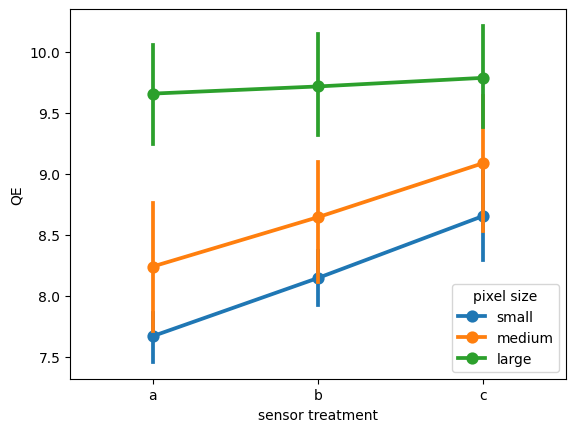

In [125]:
sns.pointplot(two_way_df, y='QE', x='sensor treatment',hue='pixel size')

### Plot the main effect of sensor treatment (collapse over pixel size)

<Axes: xlabel='sensor treatment', ylabel='QE'>

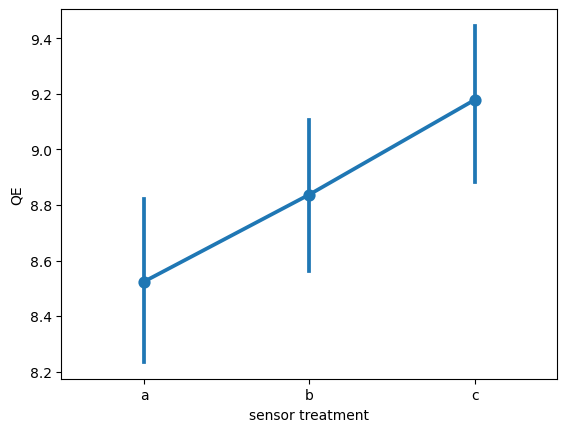

In [126]:
sns.pointplot(two_way_df, y='QE', x='sensor treatment')

### Plot the main effect of pixel size (collapse over sensor treatment)

<Axes: xlabel='pixel size', ylabel='QE'>

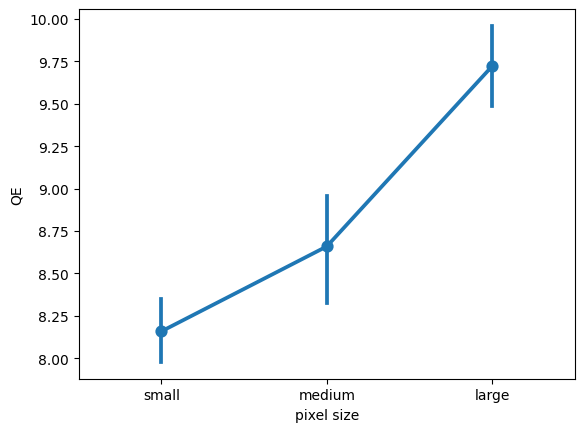

In [127]:
sns.pointplot(two_way_df, y='QE', x='pixel size')

### Two-way with a between-subjects design

In [128]:
# pg.anova(two_way_df, dv='QE', between=['pixel size','sensor size'])

## Now, let's run this as a two-way ANOVA

In [129]:
data = pd.DataFrame({'a': np.random.normal(size=100),
                         'b': np.random.normal(size=100),
                         'c': np.random.normal(size=100),
                         'd': np.random.normal(size=100),
                         'e': np.random.normal(size=100)})

# data

### Note to Gabe:  The normality test needs to be applied to the ANOVA's residuals.  Unfortunately, Pingouin doesn't return residuals, yet!  

In [130]:
# pg.normality(two_way_df['QE'])

In [131]:
pg.anova(two_way_df, dv='QE', between=['sensor treatment','pixel size'])

,Source,SS,DF,MS,F,p-unc,np2
0,sensor treatment,19.276914,2,9.638457,6.538326,1.695449e-03,0.047712
1,pixel size,114.671010,2,57.335505,38.894009,1.644284e-15,0.229607
2,sensor treatment * pixel size,6.347438,4,1.586859,1.076459,3.685541e-01,0.016230
3,Residual,384.752488,261,1.474147,NaN,NaN,NaN


Post-hoc tests.  Because the interaction is not significant, we can set `interaction=False` to supress that unnecessary output.

In [132]:
pg.pairwise_tests(two_way_df, dv='QE', between=['pixel size','sensor treatment'], interaction=False)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,pixel size,large,medium,False,True,5.124886,178.0,two-sided,7.703711e-07,1.775e+04,0.760749
1,pixel size,large,small,False,True,10.149576,178.0,two-sided,2.190632e-19,1.726e+16,1.506625
2,pixel size,medium,small,False,True,2.646512,178.0,two-sided,8.861491e-03,4.037,0.392854
3,sensor treatment,a,b,False,True,-1.518033,178.0,two-sided,1.307802e-01,0.47,-0.225340
4,sensor treatment,a,c,False,True,-3.123074,178.0,two-sided,2.089479e-03,13.939,-0.463596
5,sensor treatment,b,c,False,True,-1.709563,178.0,two-sided,8.908929e-02,0.626,-0.253771


### Here's another dataset with two independent variables.  In this case, I'm building in a significant interaction between the variables.

<Axes: xlabel='sensor treatment', ylabel='QE'>

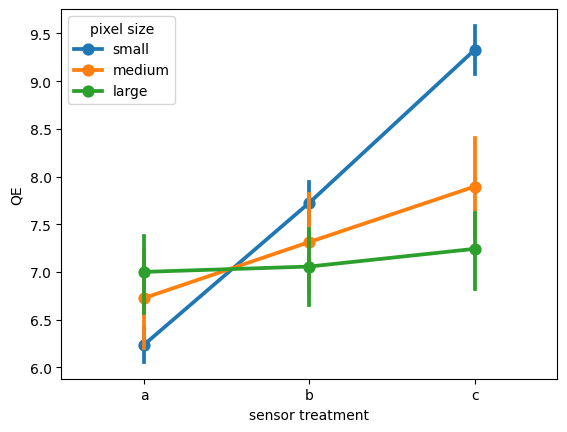

In [133]:
# s_1
# small, medium, large sensor size with coating 1
s_1 = [ np.round(i,2) for i in np.random.normal(6.3,0.5,30)];
m_1 = [ np.round(i,2) for i in np.random.normal(6.5,1.5,30)];
l_1 = [ np.round(i,2) for i in np.random.normal(6.7,1.15,30)];

# small, medium, large sensor size with coating 2
s_2 = s_1 + np.random.normal(1.5,0.5,len(s_1))
m_2 = m_1 + np.random.normal(0.6,0.5,len(s_1))
l_2 = l_1 + np.random.normal(0.1,0.15,len(s_1))

# small, medium, large sensor size with coating 3
s_3 = s_2 + np.random.normal(1.5,0.5,len(s_1))
m_3 = m_2 + np.random.normal(0.6,0.5,len(s_1))
l_3 = l_2 + np.random.normal(0.2,0.15,len(s_1))


s_1 = pd.DataFrame(s_1,columns=['QE'])
m_1 = pd.DataFrame(m_1,columns=['QE'])
l_1 = pd.DataFrame(l_1,columns=['QE'])

s_2 = pd.DataFrame(s_2,columns=['QE'])
m_2 = pd.DataFrame(m_2,columns=['QE'])
l_2 = pd.DataFrame(l_2,columns=['QE'])

s_3 = pd.DataFrame(s_3,columns=['QE'])
m_3 = pd.DataFrame(m_3,columns=['QE'])
l_3 = pd.DataFrame(l_3,columns=['QE'])

s_1['pixel size'] = 'small'
m_1['pixel size'] = 'medium'
l_1['pixel size'] = 'large'

s_2['pixel size'] = 'small'
m_2['pixel size'] = 'medium'
l_2['pixel size'] = 'large'

s_3['pixel size'] = 'small'
m_3['pixel size'] = 'medium'
l_3['pixel size'] = 'large'

s_1['sensor treatment'] = 'a'
m_1['sensor treatment'] = 'a'
l_1['sensor treatment'] = 'a'

s_2['sensor treatment'] = 'b'
m_2['sensor treatment'] = 'b'
l_2['sensor treatment'] = 'b'

s_3['sensor treatment'] = 'c'
m_3['sensor treatment'] = 'c'
l_3['sensor treatment'] = 'c'

s_1['observer id'] = np.arange(1,len(s_1)+1)
s_2['observer id'] = np.arange(1,len(s_1)+1)
s_3['observer id'] = np.arange(1,len(s_1)+1)

m_1['observer id'] = np.arange(1,len(s_1)+1)
m_2['observer id'] = np.arange(1,len(s_1)+1)
m_3['observer id'] = np.arange(1,len(s_1)+1)

l_1['observer id'] = np.arange(1,len(s_1)+1)
l_2['observer id'] = np.arange(1,len(s_1)+1)
l_3['observer id'] = np.arange(1,len(s_1)+1)

two_way_interaction = pd.concat([s_1, m_1, l_1, s_2, m_2, l_2, s_3, m_3,l_3])
two_way_interaction
sns.pointplot(two_way_interaction, y='QE', x='sensor treatment',hue='pixel size')

In [134]:
pg.normality(two_way_interaction['QE'])

,W,pval,normal
QE,0.995847,0.692606,True


In [135]:
pg.anova(two_way_interaction, dv='QE', between=['sensor treatment','pixel size'])

,Source,SS,DF,MS,F,p-unc,np2
0,sensor treatment,101.442150,2,50.721075,39.999383,7.036308e-16,0.234601
1,pixel size,20.662605,2,10.331302,8.147416,3.695595e-04,0.058764
2,sensor treatment * pixel size,63.426813,4,15.856703,12.504829,2.541042e-09,0.160824
3,Residual,330.960120,261,1.268046,NaN,NaN,NaN


In [136]:
pg.pairwise_tests(two_way_interaction, dv='QE', between=['sensor treatment', 'pixel size'],padjust='sidak')

,Contrast,sensor treatment,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,sensor treatment,-,a,b,False,True,-4.175766,178.0,two-sided,4.642867e-05,1.392796e-04,sidak,413.084,-0.619860
1,sensor treatment,-,a,c,False,True,-7.802431,178.0,two-sided,4.964797e-13,1.489475e-12,sidak,1.265e+10,-1.158210
2,sensor treatment,-,b,c,False,True,-4.070351,178.0,two-sided,7.050123e-05,2.114888e-04,sidak,283.067,-0.604212
3,pixel size,-,large,medium,False,True,-1.065723,178.0,two-sided,2.879922e-01,6.390440e-01,sidak,0.274,-0.158198
4,pixel size,-,large,small,False,True,-3.459608,178.0,two-sided,6.770016e-04,2.029630e-03,sidak,37.447,-0.513552
5,pixel size,-,medium,small,False,True,-2.070947,178.0,two-sided,3.980673e-02,1.147296e-01,sidak,1.172,-0.307416
6,sensor treatment * pixel size,a,large,medium,False,True,0.821389,58.0,two-sided,4.147881e-01,9.919496e-01,sidak,0.348,0.209328
7,sensor treatment * pixel size,a,large,small,False,True,3.370257,58.0,two-sided,1.340827e-03,1.200293e-02,sidak,24.211,0.858895
8,sensor treatment * pixel size,a,medium,small,False,True,1.766613,58.0,two-sided,8.255481e-02,5.395090e-01,sidak,0.959,0.450214
9,sensor treatment * pixel size,b,large,medium,False,True,-0.763672,58.0,two-sided,4.481579e-01,9.952539e-01,sidak,0.335,-0.194619


### Two-way with a within-subjects design

---



In [137]:
pg.rm_anova(two_way_interaction, dv='QE', within=['sensor treatment','pixel size'],subject = 'observer id')

/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,sensor treatment,101.442150,2,58,50.721075,468.486806,1.595425e-36,6.229685e-29,0.234601,0.777511
1,pixel size,20.662605,2,58,10.331302,2.812111,6.829043e-02,7.973918e-02,0.058764,0.822727
2,sensor treatment * pixel size,63.426813,4,116,15.856703,140.580803,1.607508e-43,1.982363e-12,0.160824,0.241331


In [138]:
pg.pairwise_tests(two_way_interaction, dv='QE', within=['sensor treatment', 'pixel size'],subject = 'observer id', padjust='sidak')

,Contrast,sensor treatment,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,sensor treatment,-,a,b,True,True,-20.247702,29.0,two-sided,1.175784e-18,0.000000e+00,sidak,3.792e+15,-1.183517
1,sensor treatment,-,a,c,True,True,-25.549450,29.0,two-sided,1.962443e-21,0.000000e+00,sidak,1.779e+18,-2.263340
2,sensor treatment,-,b,c,True,True,-15.688761,29.0,two-sided,1.049187e-15,2.997602e-15,sidak,5.596e+12,-1.196221
3,pixel size,-,large,medium,True,True,-0.631354,29.0,two-sided,5.327543e-01,8.979916e-01,sidak,0.234,-0.163363
4,pixel size,-,large,small,True,True,-3.053114,29.0,two-sided,4.814479e-03,1.437401e-02,sidak,8.407,-0.729329
5,pixel size,-,medium,small,True,True,-1.547248,29.0,two-sided,1.326482e-01,3.474920e-01,sidak,0.566,-0.417786
6,sensor treatment * pixel size,a,large,medium,True,True,0.804645,29.0,two-sided,4.275725e-01,9.934009e-01,sidak,0.262,0.209328
7,sensor treatment * pixel size,a,large,small,True,True,3.627666,29.0,two-sided,1.088017e-03,9.749648e-03,sidak,30.756,0.858895
8,sensor treatment * pixel size,a,medium,small,True,True,1.608317,29.0,two-sided,1.186000e-01,6.789614e-01,sidak,0.615,0.450214
9,sensor treatment * pixel size,b,large,medium,True,True,-0.741815,29.0,two-sided,4.641653e-01,9.963585e-01,sidak,0.25,-0.194619


## Mixed design

In [139]:
n = 30

s_1 = [ np.round(i,2) for i in np.random.normal(5.1,0.5,n)];
m_1 = s_1 + np.random.normal(0.8,0.5,len(s_1))
l_1 = m_1 + np.random.normal(0.8,0.5,len(s_1))

s_2 = [ np.round(i,2) for i in np.random.normal(5.9,0.5,n)];
m_2 = s_2 + np.random.normal(0.8,0.5,len(s_1))
l_2 = m_2 + np.random.normal(0.1,0.5,len(s_1))

s_3 = [ np.round(i,2) for i in np.random.normal(6.5,0.5,n)];
m_3 = s_3 + np.random.normal(.5,0.5,len(s_1))
l_3 = m_3 + np.random.normal(0,0.5,len(s_1))

# s_1 = [ np.round(i,2) for i in np.random.normal(5.1,0.5,n)];
# m_1 = [ np.round(i,2) for i in np.random.normal(5.9,0.5,n)];
# l_1 = [ np.round(i,2) for i in np.random.normal(7.1,0.5,n)];

# s_2 = s_1 + np.random.normal(.7,0.5,len(s_1))
# m_2 = m_1 + np.random.normal(0.8,0.5,len(s_1))
# l_2 = l_1 + np.random.normal(0.1,0.5,len(s_1))

# s_3 = s_2 + np.random.normal(0.7,0.5,len(s_1))
# m_3 = m_2 + np.random.normal(0,0.5,len(s_1))
# l_3 = l_2 + np.random.normal(0,0.5,len(s_1))

s_1 = pd.DataFrame(s_1,columns=['dprime'])
m_1 = pd.DataFrame(m_1,columns=['dprime'])
l_1 = pd.DataFrame(l_1,columns=['dprime'])

s_2 = pd.DataFrame(s_2,columns=['dprime'])
m_2 = pd.DataFrame(m_2,columns=['dprime'])
l_2 = pd.DataFrame(l_2,columns=['dprime'])

s_3 = pd.DataFrame(s_3,columns=['dprime'])
m_3 = pd.DataFrame(m_3,columns=['dprime'])
l_3 = pd.DataFrame(l_3,columns=['dprime'])

s_1['experience'] = 'early career'
m_1['experience'] = 'mid career'
l_1['experience'] = 'late career'

s_2['experience'] = 'early career'
m_2['experience'] = 'mid career'
l_2['experience'] = 'late career'

s_3['experience'] = 'early career'
m_3['experience'] = 'mid career'
l_3['experience'] = 'late career'

s_1['contrast'] = 'low'
m_1['contrast'] = 'low'
l_1['contrast'] = 'low'

s_2['contrast'] = 'medium'
m_2['contrast'] = 'medium'
l_2['contrast'] = 'medium'

s_3['contrast'] = 'high'
m_3['contrast'] = 'high'
l_3['contrast'] = 'high'

# 1:30
s_1['observer id'] = np.arange(1,n+1)
s_2['observer id'] = np.arange(1,n+1)
s_3['observer id'] = np.arange(1,n+1)

#31:60
m_1['observer id'] = np.arange(n+1,2*n+1)
m_2['observer id'] = np.arange(n+1,2*n+1)
m_3['observer id'] = np.arange(n+1,2*n+1)

#61:90
l_1['observer id'] = np.arange(2*n+1,3*n+1)
l_2['observer id'] = np.arange(2*n+1,3*n+1)
l_3['observer id'] = np.arange(2*n+1,3*n+1)

two_way_mixed = pd.concat([s_1, m_1, l_1, s_2, m_2, l_2, s_3, m_3,l_3])
# two_way_mixed


<Axes: xlabel='contrast', ylabel='dprime'>

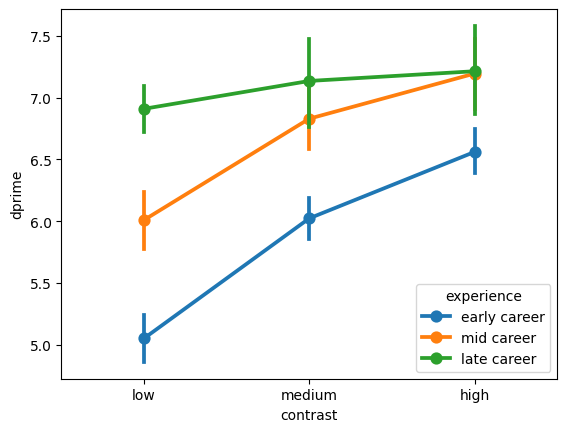

In [140]:
sns.pointplot(two_way_mixed, x='contrast', y='dprime', hue='experience')

In [141]:
pg.mixed_anova(two_way_mixed, dv='dprime', within='contrast',between='experience',subject = 'observer id')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,experience,67.854059,2,87,33.927029,64.747748,5.984968e-18,0.598144,NaN
1,contrast,46.715627,2,174,23.357814,45.244022,1.508199e-16,0.342125,0.995794
2,Interaction,11.957994,4,174,2.989498,5.790650,2.128486e-04,0.117480,NaN


In [142]:

pg.pairwise_tests(two_way_mixed, dv='dprime', within='contrast',between='experience',subject = 'observer id',correction=True,padjust='sidak')

,Contrast,contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,contrast,-,high,low,True,True,8.692707,89.000000,two-sided,1.624194e-13,4.872769e-13,sidak,4.632e+10,1.109529
1,contrast,-,high,medium,True,True,2.998716,89.000000,two-sided,3.514826e-03,1.050746e-02,sidak,7.48,0.375731
2,contrast,-,low,medium,True,True,-5.891049,89.000000,two-sided,6.717983e-08,2.015395e-07,sidak,1.842e+05,-0.720478
3,experience,-,early career,late career,False,True,-10.584031,46.358025,two-sided,5.893279e-14,1.768585e-13,sidak,1.142e+12,-2.697294
4,experience,-,early career,mid career,False,True,-9.103499,56.587939,two-sided,1.117197e-12,3.351652e-12,sidak,5.917e+09,-2.319987
5,experience,-,late career,mid career,False,True,3.420471,50.927264,two-sided,1.239537e-03,3.714005e-03,sidak,27.507,0.871692
6,contrast * experience,high,early career,late career,False,True,-3.186465,42.424553,two-sided,2.702131e-03,2.405798e-02,sidak,15.362,-0.812057
7,contrast * experience,high,early career,mid career,False,True,-3.815108,49.959840,two-sided,3.757485e-04,3.376658e-03,sidak,78.654,-0.972264
8,contrast * experience,high,late career,mid career,False,True,0.081436,54.045416,two-sided,9.353963e-01,1.000000e+00,sidak,0.263,0.020754
9,contrast * experience,low,early career,late career,False,True,-13.135082,57.983314,two-sided,5.029375e-19,0.000000e+00,sidak,5.988e+15,-3.347419


<Axes: xlabel='sensor treatment', ylabel='QE'>

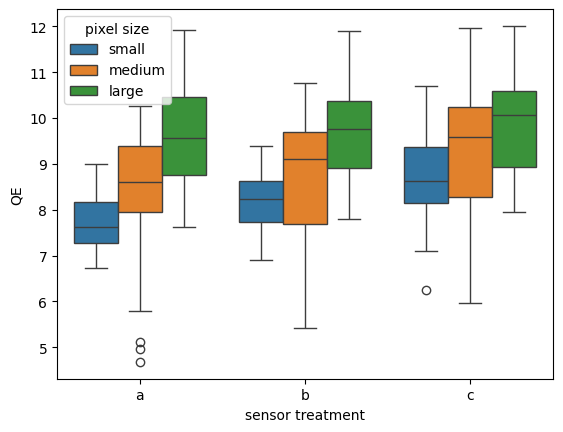

In [143]:
sns.boxplot(two_way_df, y='QE', x='sensor treatment',hue='pixel size')

In [144]:

### This code is something gabe was playing with, but put aside for now.

# nObservers_group = 20

# # Three groups (Experience level: early career, mid career, late career)
# # Three contrasts (low, medium, high)

# # EL, EM, EL, ML, MM, MH, HL, HM, HH

# contrast_scalars = [1, 2, 3]
# experience_scalars = [.5, 1, 1]


# mu_list = []

# for contrast_level, experience_level in zip(np.arange(0,len(contrast_scalars)), np.arange(0,len(experience_scalars))):
#   mu_level = .5 + 0.3*contrast_scalars[contrast_level] + 0.2*experience_scalars[experience_level]
#   sigma_level = np.random.normal(0.3, 0.1)




# df.pivot(index='patient', columns='obs', values='score')
# sns.pointplot(two_way_df, y='QE', x='sensor treatment',hue='pixel size')